# Sample Dataset

in order to get some sample dataset we need to get tensorflow dataset.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

#Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Imporve progress bar display 
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

# This will go away in the future. 
# If this gives an error, you might be running TF2 or above
# If so, the just comment out this line and run this cell again
tf.enable_eager_execution()


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

1.13.1


In [18]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [20]:
# Explore the data
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [21]:
# Preprocess the data
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

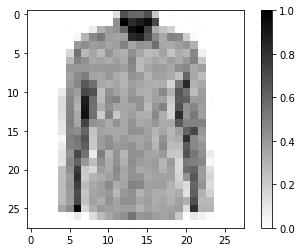

In [23]:
# Take a single image, and remove the color dimension by reshaping 
for image, label in test_dataset.take(1): 
    break
image = image.numpy().reshape((28, 28))

# Plot the image
%matplotlib inline
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

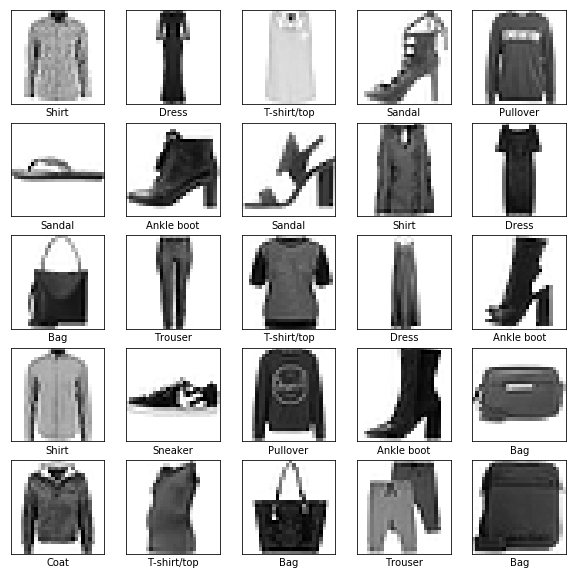

In [24]:
%matplotlib inline
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

## Build the model 
#### Setup the layers 
- basic building block of a neural network is the layer
- layer extracts represntation from data fed into it 
- series of connected layers results in a respresntation that is meaningful for problem at hand

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

network has 3 layers:
* input `tf.keras.layers.Flatten` 
    * transform image from 2d-array of 28x28px to 1d-array of 784px (28*28)  
    * unstack rows of pixels in image that is lined up  
    * layer has no param to learn, as it only reformats the data  
* "hidden" `tf.keras.layers.Dense`
    * densely connected layer of 128 neurons
    * each neuron(node):
        * takes input from prev layer (all 784 nodes) 
        * weighs the input accordingly to hidden param which will be learned during training
        * outputs a single value to the next layer 
* "output" `tf.keras.layers.Dense`
    * 10-node softmax layer, each node representing a class of clothing
    * each node takes input from 128 nodes in the layer before it 
    * node weights the input according to learned param and then output value in range [0, 1]
    * sum of all 10 node values is 1


In [26]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train the model  

define the iteration behavior for the dataset:
1. repeat forever by specifying dataset.repeat() 
2. dataset.shuffle(60000) randomizes order so our model cannot learn anything from the order of the example
3. dataset.batch(32) tells model.fit to use batches of 32 images and labels when updating model variables

Training is performed by calling model.fit method:
1. feed the training data to the model using train_dataset
2. model learns to associate images and labels 
3. `epochs=5` param limits training to 5 full iterations of training dataset so 5*60000 = 300000 examples

*(Don't worry about steps_per_epoxh, the requirement to have this flag will soon be removed)*

In [27]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [28]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - ETA: 1:53:05 - loss: 2.4670 - acc: 0.12 - ETA: 9:29 - loss: 1.7614 - acc: 0.4297   - ETA: 4:59 - loss: 1.4726 - acc: 0.519 - ETA: 3:18 - loss: 1.2890 - acc: 0.567 - ETA: 2:28 - loss: 1.1647 - acc: 0.609 - ETA: 2:01 - loss: 1.0843 - acc: 0.637 - ETA: 1:42 - loss: 1.0139 - acc: 0.662 - ETA: 1:29 - loss: 0.9639 - acc: 0.677 - ETA: 1:18 - loss: 0.9284 - acc: 0.687 - ETA: 1:09 - loss: 0.9026 - acc: 0.693 - ETA: 1:02 - loss: 0.8713 - acc: 0.700 - ETA: 57s - loss: 0.8537 - acc: 0.706 - ETA: 54s - loss: 0.8339 - acc: 0.71 - ETA: 51s - loss: 0.8224 - acc: 0.71 - ETA: 47s - loss: 0.8054 - acc: 0.72 - ETA: 44s - loss: 0.7920 - acc: 0.72 - ETA: 42s - loss: 0.7850 - acc: 0.73 - ETA: 40s - loss: 0.7797 - acc: 0.73 - ETA: 38s - loss: 0.7712 - acc: 0.73 - ETA: 36s - loss: 0.7664 - acc: 0.73 - ETA: 34s - loss: 0.7609 - acc: 0.73 - ETA: 32s - loss: 0.7545 - acc: 0.74 - ETA: 31s - loss: 0.7509 - acc: 0.74 - ETA: 30s - loss: 0.7447 - acc: 0.74 - ETA: 

1875/1875 [==============================] - ETA: 1:46 - loss: 0.3000 - acc: 0.875 - ETA: 16s - loss: 0.3674 - acc: 0.854 - ETA: 13s - loss: 0.3707 - acc: 0.86 - ETA: 11s - loss: 0.3589 - acc: 0.86 - ETA: 10s - loss: 0.3710 - acc: 0.85 - ETA: 10s - loss: 0.3696 - acc: 0.86 - ETA: 10s - loss: 0.3694 - acc: 0.86 - ETA: 10s - loss: 0.3730 - acc: 0.86 - ETA: 9s - loss: 0.3831 - acc: 0.8614 - ETA: 9s - loss: 0.3857 - acc: 0.860 - ETA: 9s - loss: 0.3891 - acc: 0.859 - ETA: 9s - loss: 0.3927 - acc: 0.857 - ETA: 9s - loss: 0.3918 - acc: 0.857 - ETA: 9s - loss: 0.3849 - acc: 0.862 - ETA: 9s - loss: 0.3833 - acc: 0.861 - ETA: 8s - loss: 0.3815 - acc: 0.860 - ETA: 9s - loss: 0.3829 - acc: 0.858 - ETA: 8s - loss: 0.3836 - acc: 0.858 - ETA: 8s - loss: 0.3859 - acc: 0.858 - ETA: 8s - loss: 0.3896 - acc: 0.857 - ETA: 8s - loss: 0.3905 - acc: 0.856 - ETA: 8s - loss: 0.3912 - acc: 0.856 - ETA: 8s - loss: 0.3880 - acc: 0.857 - ETA: 8s - loss: 0.3869 - acc: 0.857 - ETA: 8s - loss: 0.3882 - acc: 0.856 - E

1875/1875 [==============================] - ETA: 1:20 - loss: 0.2659 - acc: 0.875 - ETA: 14s - loss: 0.3358 - acc: 0.859 - ETA: 11s - loss: 0.3356 - acc: 0.87 - ETA: 11s - loss: 0.3243 - acc: 0.88 - ETA: 10s - loss: 0.3375 - acc: 0.87 - ETA: 10s - loss: 0.3363 - acc: 0.87 - ETA: 9s - loss: 0.3377 - acc: 0.8736 - ETA: 9s - loss: 0.3415 - acc: 0.872 - ETA: 9s - loss: 0.3418 - acc: 0.874 - ETA: 9s - loss: 0.3373 - acc: 0.874 - ETA: 9s - loss: 0.3441 - acc: 0.871 - ETA: 9s - loss: 0.3412 - acc: 0.874 - ETA: 8s - loss: 0.3480 - acc: 0.872 - ETA: 8s - loss: 0.3467 - acc: 0.872 - ETA: 8s - loss: 0.3465 - acc: 0.872 - ETA: 8s - loss: 0.3491 - acc: 0.871 - ETA: 8s - loss: 0.3540 - acc: 0.869 - ETA: 8s - loss: 0.3515 - acc: 0.870 - ETA: 8s - loss: 0.3514 - acc: 0.871 - ETA: 8s - loss: 0.3526 - acc: 0.870 - ETA: 8s - loss: 0.3529 - acc: 0.870 - ETA: 8s - loss: 0.3535 - acc: 0.871 - ETA: 8s - loss: 0.3545 - acc: 0.871 - ETA: 8s - loss: 0.3535 - acc: 0.871 - ETA: 8s - loss: 0.3517 - acc: 0.871 - E

1875/1875 [==============================] - ETA: 1:29 - loss: 0.6805 - acc: 0.812 - ETA: 15s - loss: 0.4180 - acc: 0.854 - ETA: 12s - loss: 0.3835 - acc: 0.85 - ETA: 11s - loss: 0.3757 - acc: 0.86 - ETA: 10s - loss: 0.3785 - acc: 0.86 - ETA: 10s - loss: 0.3694 - acc: 0.86 - ETA: 9s - loss: 0.3462 - acc: 0.8745 - ETA: 9s - loss: 0.3382 - acc: 0.879 - ETA: 9s - loss: 0.3355 - acc: 0.878 - ETA: 9s - loss: 0.3330 - acc: 0.878 - ETA: 9s - loss: 0.3327 - acc: 0.878 - ETA: 9s - loss: 0.3369 - acc: 0.875 - ETA: 9s - loss: 0.3371 - acc: 0.874 - ETA: 9s - loss: 0.3377 - acc: 0.875 - ETA: 8s - loss: 0.3354 - acc: 0.876 - ETA: 8s - loss: 0.3347 - acc: 0.876 - ETA: 8s - loss: 0.3351 - acc: 0.876 - ETA: 8s - loss: 0.3361 - acc: 0.877 - ETA: 8s - loss: 0.3335 - acc: 0.877 - ETA: 8s - loss: 0.3319 - acc: 0.878 - ETA: 8s - loss: 0.3296 - acc: 0.879 - ETA: 8s - loss: 0.3272 - acc: 0.880 - ETA: 8s - loss: 0.3267 - acc: 0.880 - ETA: 8s - loss: 0.3275 - acc: 0.881 - ETA: 8s - loss: 0.3258 - acc: 0.881 - E

1875/1875 [==============================] - ETA: 1:33 - loss: 0.3712 - acc: 0.937 - ETA: 15s - loss: 0.3239 - acc: 0.893 - ETA: 12s - loss: 0.3093 - acc: 0.88 - ETA: 11s - loss: 0.3112 - acc: 0.88 - ETA: 10s - loss: 0.3035 - acc: 0.88 - ETA: 10s - loss: 0.3046 - acc: 0.88 - ETA: 9s - loss: 0.3001 - acc: 0.8868 - ETA: 9s - loss: 0.3136 - acc: 0.881 - ETA: 9s - loss: 0.3121 - acc: 0.880 - ETA: 9s - loss: 0.3092 - acc: 0.881 - ETA: 9s - loss: 0.3057 - acc: 0.882 - ETA: 9s - loss: 0.3018 - acc: 0.883 - ETA: 9s - loss: 0.3037 - acc: 0.883 - ETA: 8s - loss: 0.3075 - acc: 0.882 - ETA: 8s - loss: 0.3053 - acc: 0.884 - ETA: 8s - loss: 0.3036 - acc: 0.885 - ETA: 8s - loss: 0.3037 - acc: 0.885 - ETA: 8s - loss: 0.3091 - acc: 0.882 - ETA: 8s - loss: 0.3099 - acc: 0.882 - ETA: 8s - loss: 0.3076 - acc: 0.882 - ETA: 8s - loss: 0.3080 - acc: 0.881 - ETA: 8s - loss: 0.3076 - acc: 0.881 - ETA: 8s - loss: 0.3096 - acc: 0.880 - ETA: 8s - loss: 0.3104 - acc: 0.880 - ETA: 8s - loss: 0.3116 - acc: 0.880 - E

In [29]:
# Evaluate accuracy 
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
test_accuracy

313/313 [==============================] - ETA: 26s - loss: 0.3623 - acc: 0.90 - ETA: 1s - loss: 0.2817 - acc: 0.8954 - ETA: 1s - loss: 0.3112 - acc: 0.882 - ETA: 0s - loss: 0.3311 - acc: 0.881 - ETA: 0s - loss: 0.3246 - acc: 0.883 - ETA: 0s - loss: 0.3303 - acc: 0.881 - ETA: 0s - loss: 0.3353 - acc: 0.879 - ETA: 0s - loss: 0.3318 - acc: 0.878 - ETA: 0s - loss: 0.3279 - acc: 0.879 - ETA: 0s - loss: 0.3246 - acc: 0.881 - ETA: 0s - loss: 0.3298 - acc: 0.880 - ETA: 0s - loss: 0.3279 - acc: 0.881 - ETA: 0s - loss: 0.3321 - acc: 0.879 - ETA: 0s - loss: 0.3362 - acc: 0.879 - ETA: 0s - loss: 0.3354 - acc: 0.880 - ETA: 0s - loss: 0.3367 - acc: 0.880 - ETA: 0s - loss: 0.3364 - acc: 0.879 - 1s 3ms/step - loss: 0.3348 - acc: 0.8798


0.8798

In [30]:
for test_images, test_labels in test_dataset.take(1):
    test_images = test_images.numpy()
    test_labels = test_labels.numpy()
    predictions = model.predict(test_images)
predictions.shape

(32, 10)

In [31]:
predictions[0]

array([1.02062804e-04, 5.93018479e-09, 7.99112860e-03, 7.86269520e-05,
       2.90907994e-02, 5.87244870e-07, 9.62727666e-01, 6.24692409e-10,
       9.21640003e-06, 4.36905303e-08], dtype=float32)

In [32]:
np.argmax(predictions[0])

6

In [34]:
test_labels[0]

6

In [37]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img[...,0], cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
              color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [39]:
def graph_prediction(i):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions, test_labels)

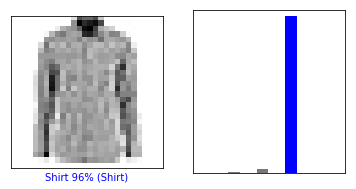

In [40]:
graph_prediction(0)

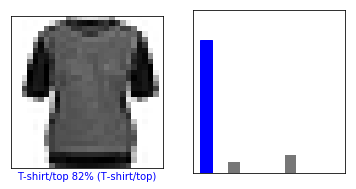

In [41]:
graph_prediction(12)